## 177. Nth Highest Salary


**Change Log**   

| Date | Description |
| ---------- | ---------- |
| 2022-04-11 | Initialize |



## Summary

Get the **n<sup>th</sup>** highest `salary` from the `Employee` table.

#### SQL Schema

```sql
Create table If Not Exists Employee (id int, salary int)
Truncate table Employee
insert into Employee (id, salary) values ('1', '100')
insert into Employee (id, salary) values ('2', '200')
insert into Employee (id, salary) values ('3', '300')

```

Table: Employee

```
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| salary      | int  |
+-------------+------+
```
id is the primary key column for this table.  
Each row of this table contains information about the salary of an employee.

## Problem

Write an SQL query to report the **n<sup>th</sup>** highest salary from the `Employee` table. If there is no **n<sup>th</sup>** highest salary, the query should report `null`.

The query result format is in the following example.

 

#### Example 1:

**Input:** 
```
Employee table:
+----+--------+
| id | salary |
+----+--------+
| 1  | 100    |
| 2  | 200    |
| 3  | 300    |
+----+--------+
n = 2
```
**Output:**
```
+------------------------+
| getNthHighestSalary(2) |
+------------------------+
| 200                    |
+------------------------+
```

#### Example 2:


**Input:**
```
Employee table:
+----+--------+
| id | salary |
+----+--------+
| 1  | 100    |
+----+--------+
n = 2
```
**Output:**
```
+------------------------+
| getNthHighestSalary(2) |
+------------------------+
| null                   |
+------------------------+
```

--- 

#### Provided Signature


```sql
CREATE FUNCTION getNthHighestSalary(@N INT) RETURNS INT AS
BEGIN
    RETURN (
        /* Write your T-SQL query statement below. */
        
    );
END  
```

--- 

## Solution 1 - MSSQL

This is similar to what we did in problem 176, but instead of getting a fixed second highest we need to be able to dynamically use any offset from the highest.  NOTE: I wrote `OFFSET` from highest, that is a hint we are going to use that.


```sql
CREATE FUNCTION getNthHighestSalary(@N INT) RETURNS INT AS
BEGIN
    DECLARE @oset   INT;
    SET     @oset   = @N-1;
    RETURN (
        /* Write your T-SQL query statement below. */
        SELECT  DISTINCT salary
        FROM    Employee e
        ORDER BY salary DESC
        OFFSET  @oset ROWS
        FETCH   NEXT 1 ROWS ONLY
    );
END
```

### Result

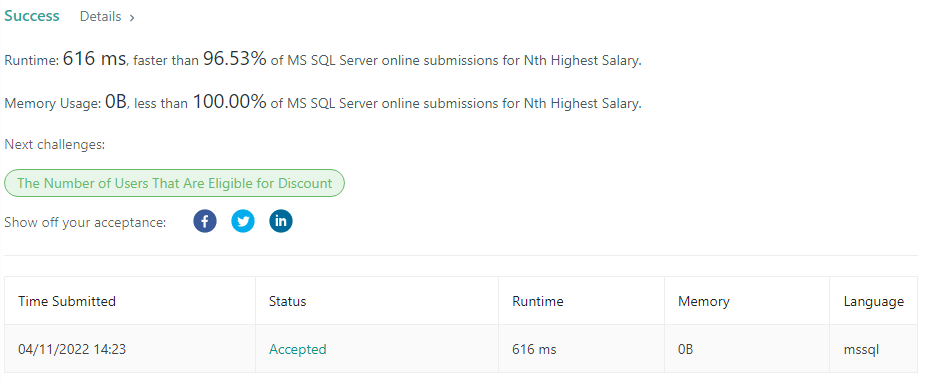



The results look good.

--- 

## Solution 2 - MSSQL - Add NOLOCK

Same as *Solution 1* except we add the NOLOCK table hint.


```sql
    DECLARE @oset   INT;
    SET     @oset   = @N-1;
    RETURN (
        /* Write your T-SQL query statement below. */
        SELECT  DISTINCT salary
        FROM    Employee e (NOLOCK)
        ORDER BY salary DESC
        OFFSET  @oset ROWS
        FETCH   NEXT 1 ROWS ONLY
    );
```

### Result

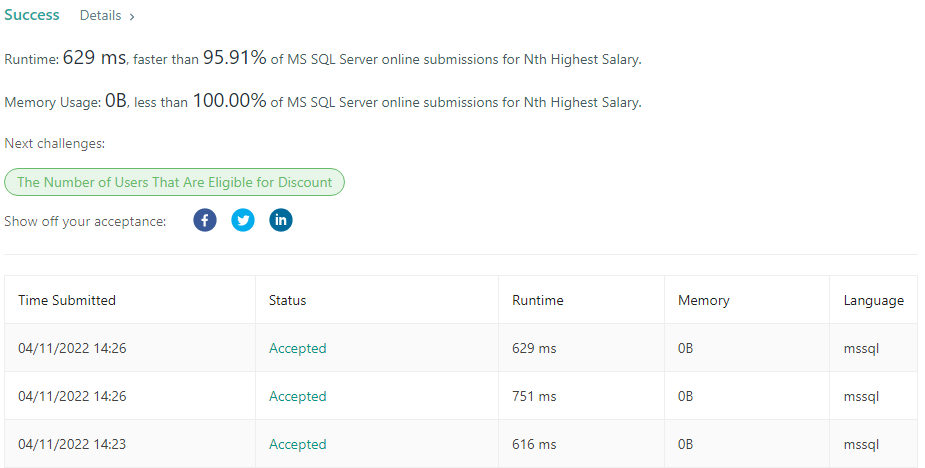

Nearly identical results with the `NOLOCK` directive.  

--- 

## Solution 3 - MySQL 

```sql
CREATE FUNCTION getNthHighestSalary(N INT) RETURNS INT
BEGIN
    DECLARE oset INT;
    SET     oset = N - 1;
    RETURN (
        /* Write your T-SQL query statement below. */
        SELECT  DISTINCT salary
        FROM    Employee e
        ORDER BY salary DESC
        LIMIT  oset, 1
        
    );
END

```



### Result

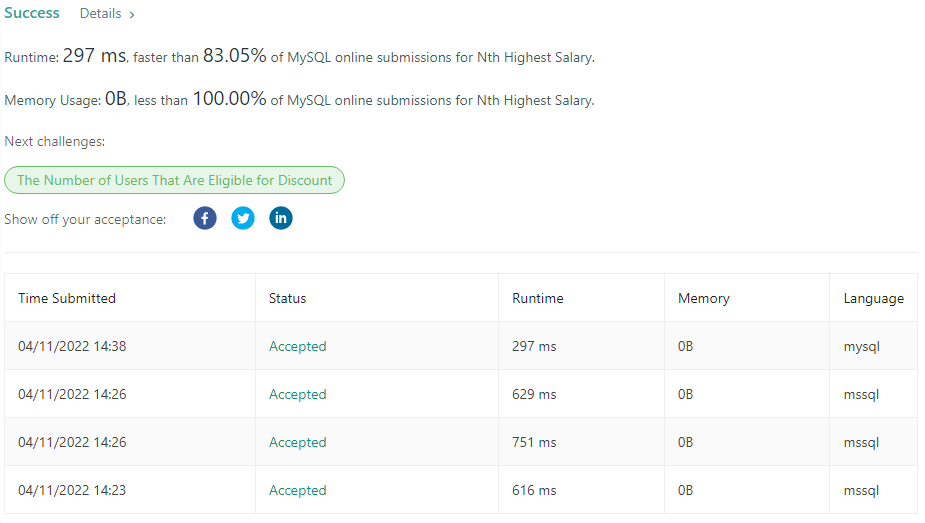


